**Participantes do grupo 42:**
Mariana Cavalcante Oliveira rm561678/
Henrique Ribeiro Siqueira rm565044/
Thiago Scutari da Silva rm562831/

In [1]:
pip install scikit-learn

In [2]:
# Instalações
!pip install lime
!pip install shap
# Suprimir warnings
import warnings
warnings.filterwarnings('ignore')
# Leitura de dados e gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preparação de dados
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Modelos preditivos
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# Avaliação de modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
# Interpretabilidade de modelos
from lime import lime_tabular
import shap

# Avaliando os modelos de classificação, calculando algumas métricas
def avaliar_modelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1
# Plota a matriz de confusão
def plotar_matriz_confusao(y_true, y_pred, title):

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    # Plot da matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Saiu', 'Saiu'],
                yticklabels=['Não Saiu', 'Saiu'])
    plt.xlabel('Predição')
    plt.ylabel('Valor Real')
    plt.title(title)
    plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=50efaab519f5913dc0f4d7213b8a2e5d447481185cfbf60888b610ddf9007bd3
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [3]:
from google.colab import files
uploaded = files.upload()

Saving crop_yield.csv to crop_yield.csv


In [4]:
# CARREGAMENTO DOS DADOS
data = pd.read_csv('crop_yield.csv')
display(data.sample(10))

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
150,"Rubber, natural",2604.59,18.19,83.44,26.43,6275
102,"Rice, paddy",2363.63,18.35,84.92,26.28,34221
40,Oil palm fruit,1938.42,17.54,82.11,26.11,201436
129,"Rubber, natural",2530.96,18.15,85.33,26.02,6077
112,"Rice, paddy",2308.51,18.27,83.65,26.47,40223
54,Oil palm fruit,2414.79,18.18,85.76,25.93,163541
120,"Rubber, natural",2592.35,17.61,85.07,25.56,9718
91,"Rice, paddy",2504.70,18.19,85.45,26.02,30614
74,Oil palm fruit,2410.13,18.58,83.45,26.81,172601
60,Oil palm fruit,2302.99,18.22,84.48,26.25,162240


In [5]:
data.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [6]:
# ANÁLISE EXPLORATÓRIA
#   - Informações gerais do dataset
display(data.info())

#   - Análises estatísticas gerais
display(data.describe())

#   - Identificação de duplicatas
display(f"Número de linhas duplicadas: {data.duplicated().sum()}")

#O resultado mostra que não há linhas faltantes ou duplicadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


None

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


'Número de linhas duplicadas: 0'

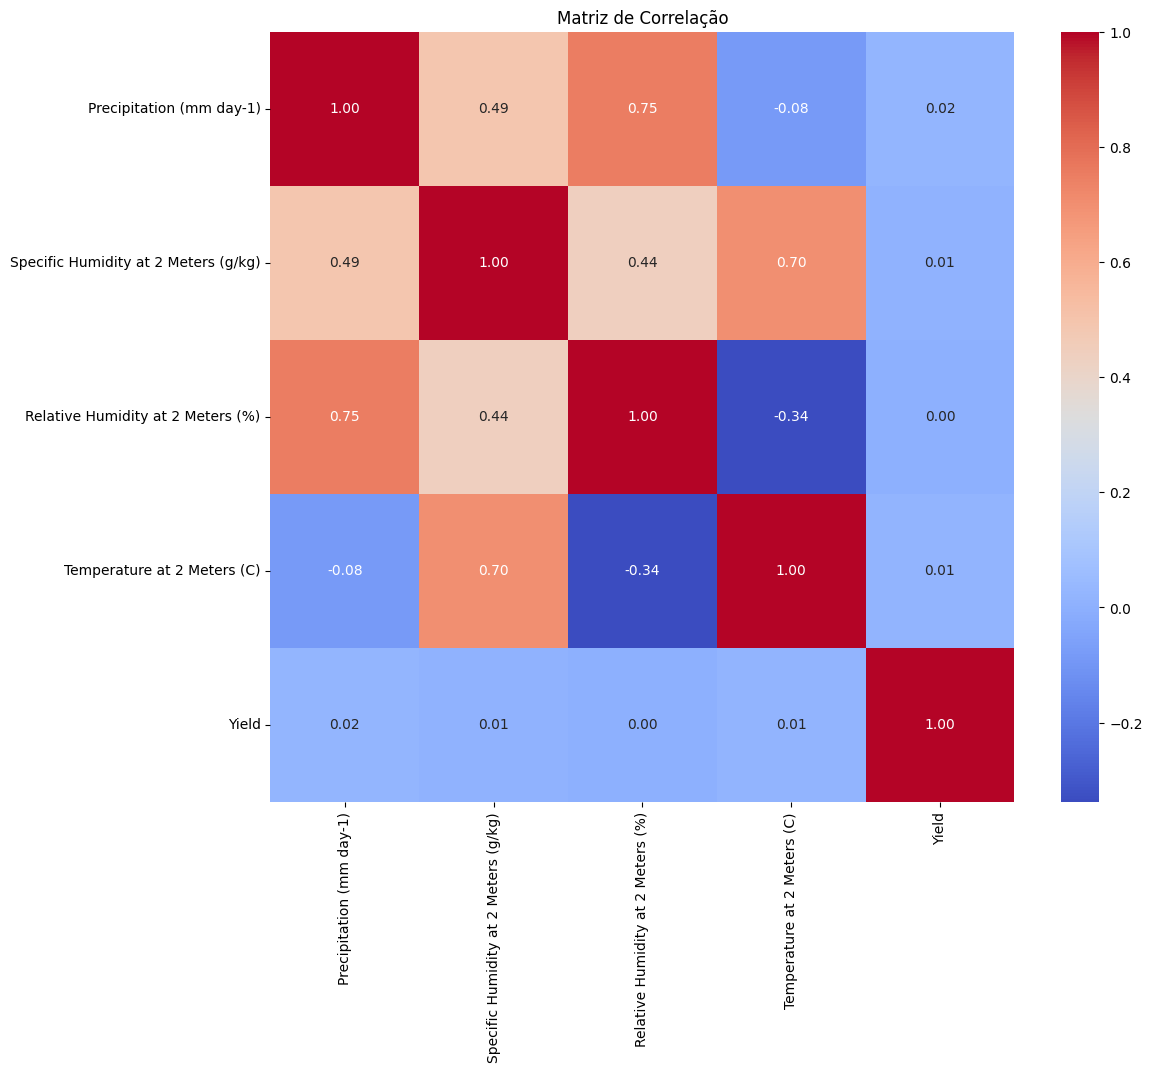

In [7]:
# Plot da matriz de correlação com mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

#A matriz de confusão mostra que existe: uma correlação forte entre Precipitação e entre Humidade Relativa (0.75); uma forte correlação entre Temperatura e humidade (0.7); uma correlação entre Humidade específica e Precipitação (0.49); uma correlação entre Humidade específica e Humidade relativa (0.44). As demais features são fracamente relacionadas. Com relação ao Rendimento, nota-se que há uma relação de 0.01 em relação as features, com exceção da feature de Precipitação em que a relação é de 0.02.

In [8]:
#Tratamento de dados
# Eliminando linhas duplicadas
data.drop_duplicates(inplace=True)
# A feature Yield possui uma baixa correlação com as demais variáveis. No entanto, não iremos eliminá-la já que o objetivo do treinamento é encontrar tendências para os rendimentos das plantações

,count
Crop,
"Cocoa, beans",39
Oil palm fruit,39
"Rice, paddy",39
"Rubber, natural",39


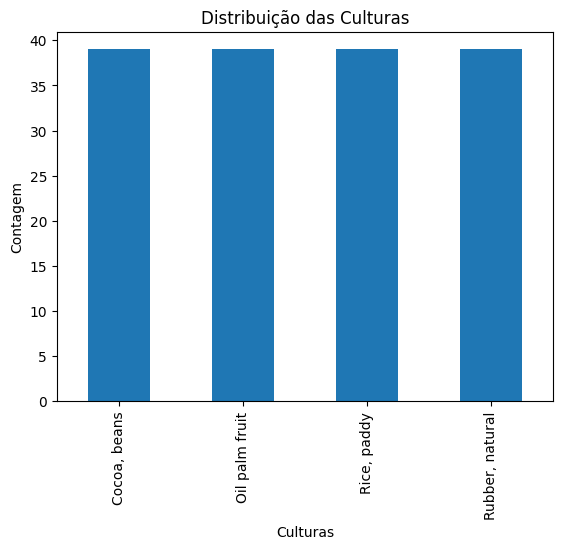

In [9]:
# Contagem das classes Cultura
contagem_classes = data['Crop'].value_counts()
display(contagem_classes)

# Gráfico de barras para visualizar o desbalanceamento
import matplotlib.pyplot as plt

contagem_classes.plot(kind='bar')
plt.title('Distribuição das Culturas')
plt.xlabel('Culturas')
plt.ylabel('Contagem')
plt.show()

#Podemos identificar que não há desbalanceamento entre as culturas já que cada classe é listada 39 vezes

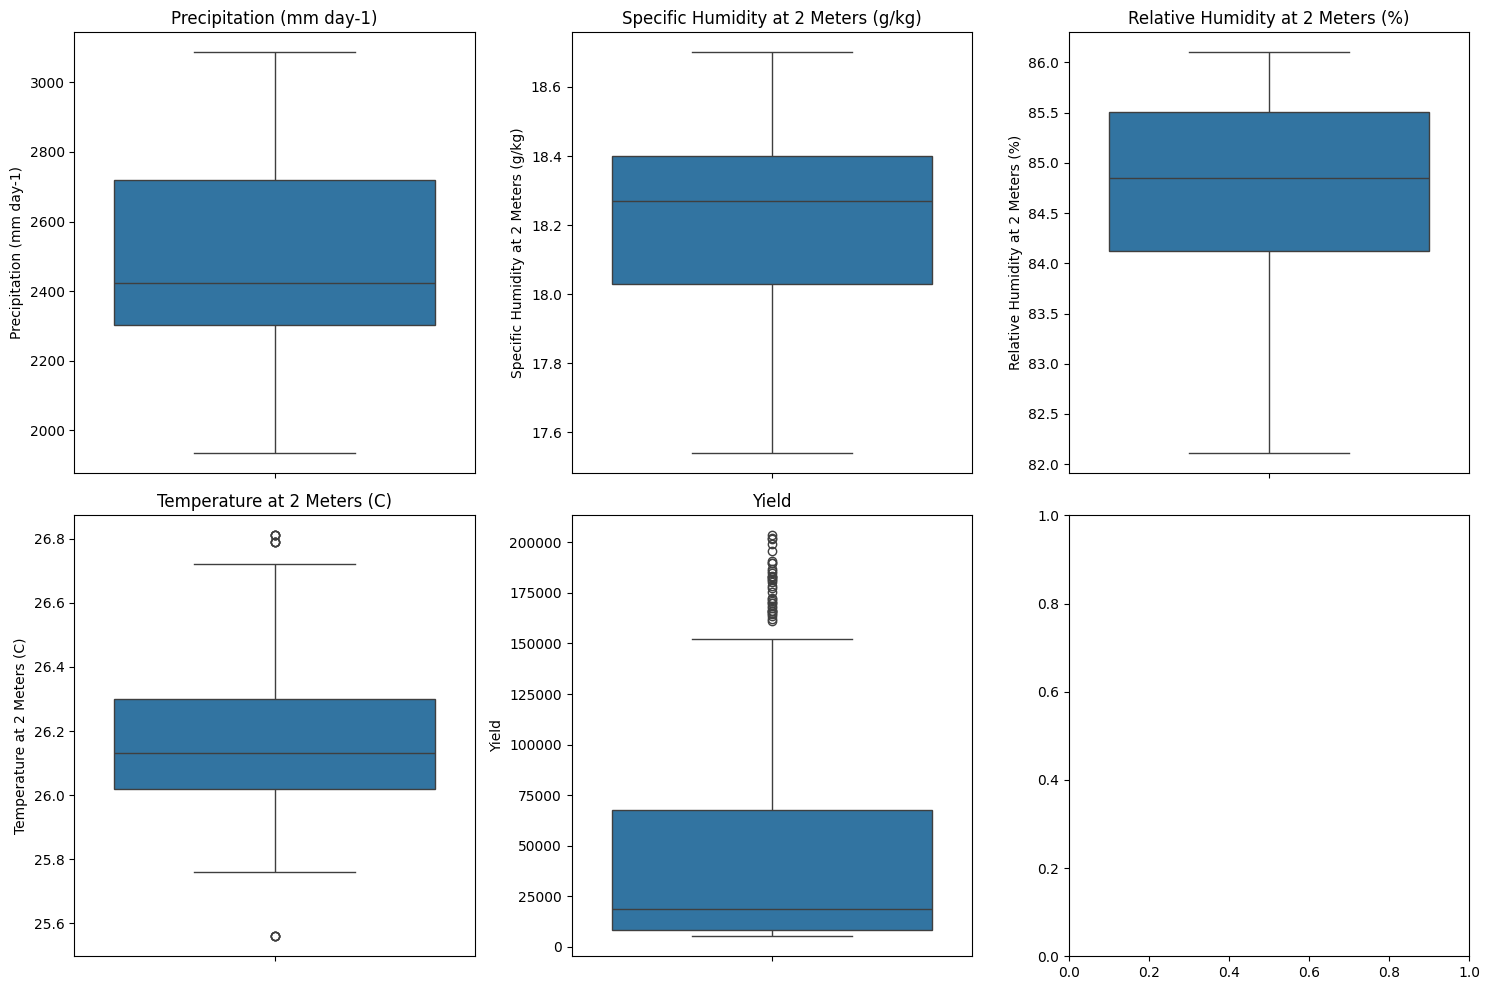

In [10]:
# Identificação de outliers via Boxplots:

import matplotlib.pyplot as plt

import seaborn as sns
data = pd.read_csv('crop_yield.csv')
#   - Selecionar as variáveis para o boxplot
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
#   - Criar uma figura com 2 linhas e 4 colunas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
#   - Iterar pelas variáveis e criar o boxplot em cada subplot
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(y=data[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)
#   - Ajustar o layout da figura
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Carregando o arquivo CSV para garantir que a coluna 'Crop' está presente
data = pd.read_csv('crop_yield.csv')

print(data.head())

           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.76   8800  


In [12]:
#Mediana, média e desvio padrao do Rendimento
data = pd.read_csv('crop_yield.csv')
Rendimento_por_cultura = data.groupby('Crop')['Yield'].agg(['mean', 'median', 'std'])
print(Rendimento_por_cultura)

                          mean    median           std
Crop                                                  
Cocoa, beans       8883.128205    8848.0   1745.030586
Oil palm fruit   175804.692308  175629.0  14919.869752
Rice, paddy       32099.666667   31101.0   4789.948436
Rubber, natural    7824.897436    7817.0   1600.255042


In [13]:
#Mediana, média e desvio padrao da Temperatura a 2 metros (ºC)
Temperatura2m_por_cultura = data.groupby('Crop')['Temperature at 2 Meters (C)'].agg(['mean', 'median', 'std'])
print(Temperatura2m_por_cultura)

                     mean  median       std
Crop                                       
Cocoa, beans     26.18359   26.13  0.263613
Oil palm fruit   26.18359   26.13  0.263613
Rice, paddy      26.18359   26.13  0.263613
Rubber, natural  26.18359   26.13  0.263613


In [14]:
#Mediana, média e desvio padrao da Umidade relativa a 2 metros (%)
Umidaderelativa2m_por_cultura = data.groupby('Crop')['Relative Humidity at 2 Meters (%)'].agg(['mean', 'median', 'std'])
print(Umidaderelativa2m_por_cultura)

                      mean  median       std
Crop                                        
Cocoa, beans     84.737692   84.85  1.006009
Oil palm fruit   84.737692   84.85  1.006009
Rice, paddy      84.737692   84.85  1.006009
Rubber, natural  84.737692   84.85  1.006009


In [15]:
#Mediana, média e desvio padrao da Umidade específica a 2 metros (g/kg)
Umidadeespecifica2m_por_cultura = data.groupby('Crop')['Specific Humidity at 2 Meters (g/kg)'].agg(['mean', 'median', 'std'])
print(Umidadeespecifica2m_por_cultura)

                      mean  median       std
Crop                                        
Cocoa, beans     18.203077   18.27  0.296809
Oil palm fruit   18.203077   18.27  0.296809
Rice, paddy      18.203077   18.27  0.296809
Rubber, natural  18.203077   18.27  0.296809


In [16]:
#Mediana, média e desvio padrao da Precipitação (mm dia 1)
Precipitacao_por_cultura = data.groupby('Crop')['Precipitation (mm day-1)'].agg(['mean', 'median', 'std'])
print(Precipitacao_por_cultura)

                        mean   median        std
Crop                                            
Cocoa, beans     2486.498974  2424.55  292.30045
Oil palm fruit   2486.498974  2424.55  292.30045
Rice, paddy      2486.498974  2424.55  292.30045
Rubber, natural  2486.498974  2424.55  292.30045


In [19]:
#Preparando para clusterização
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
print (data.head())

           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.76   8800  


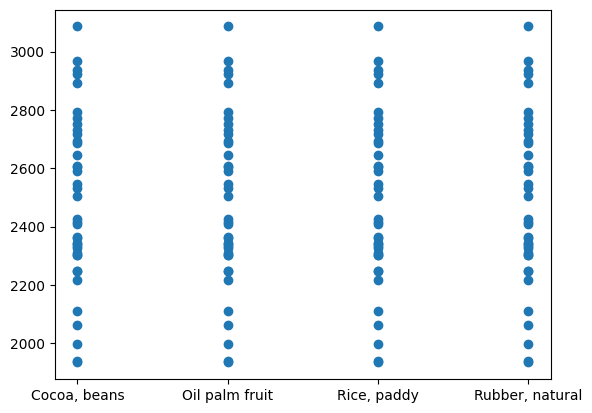

In [18]:
# Plotando os dados
plt.scatter(x=data["Crop"], y=data["Precipitation (mm day-1)"])
plt.show()

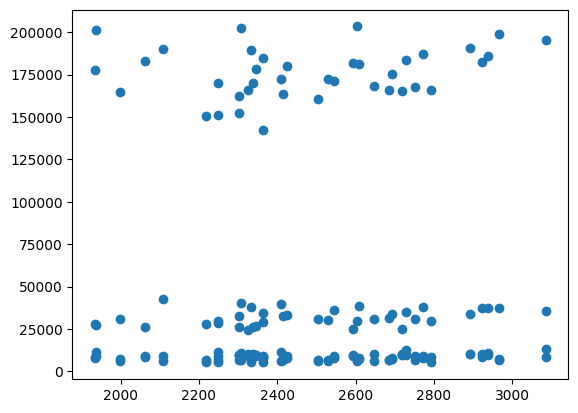

In [20]:
# Relacao entre precipitacao e rendimento
plt.scatter(x=data["Precipitation (mm day-1)"], y=data["Yield"])
plt.show()

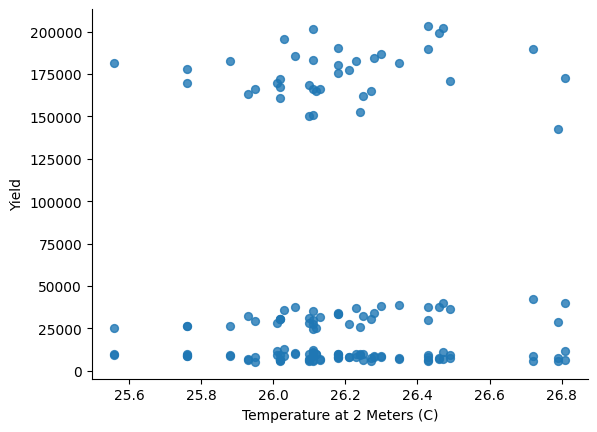

In [21]:
# @title Temperature at 2 Meters (C) vs Yield

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Temperature at 2 Meters (C)', y='Yield', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

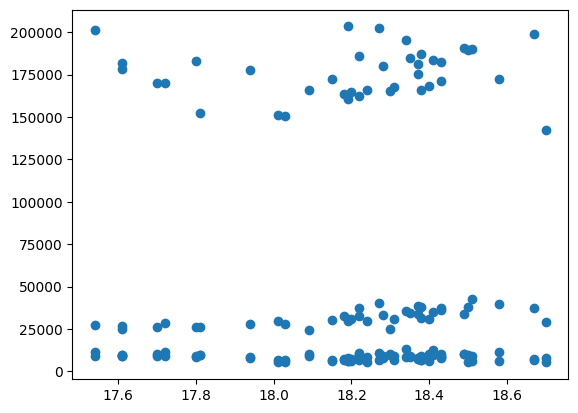

In [22]:
# Relacao entre Umidade Especifica e rendimento
plt.scatter(x=data["Specific Humidity at 2 Meters (g/kg)"], y=data["Yield"])
plt.show()

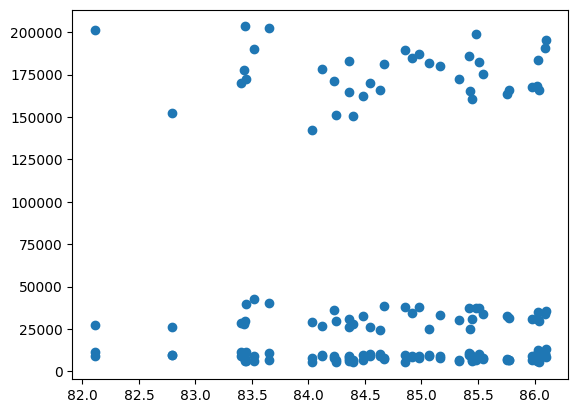

In [23]:
# Relacao entre Umidade Relativa e rendimento
plt.scatter(x=data["Relative Humidity at 2 Meters (%)"], y=data["Yield"])
plt.show()

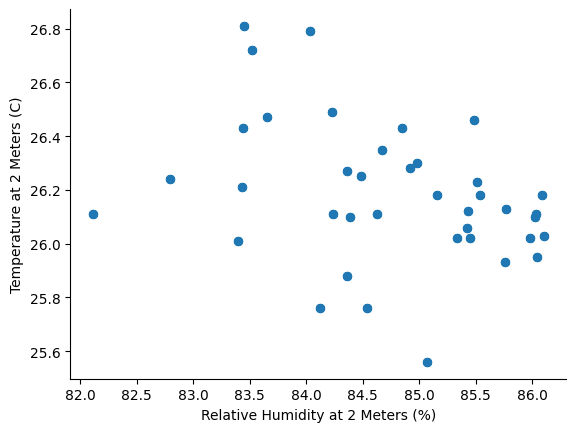

In [24]:
# @title Relative Humidity at 2 Meters (%) vs Temperature at 2 Meters (C)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Relative Humidity at 2 Meters (%)', y='Temperature at 2 Meters (C)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

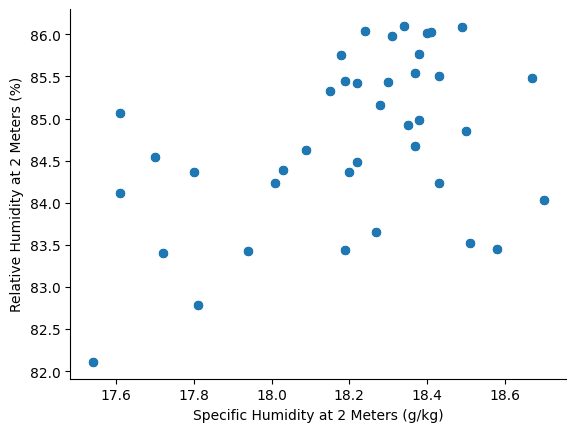

In [25]:
# @title Specific Humidity at 2 Meters (g/kg) vs Relative Humidity at 2 Meters (%)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Specific Humidity at 2 Meters (g/kg)', y='Relative Humidity at 2 Meters (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
print(data.dtypes)

Crop                                     object
Precipitation (mm day-1)                float64
Specific Humidity at 2 Meters (g/kg)    float64
Relative Humidity at 2 Meters (%)       float64
Temperature at 2 Meters (C)             float64
Yield                                     int64
dtype: object


In [27]:
# Aplicando o One-Hot Encoding na coluna 'Crop' para converter variáveis categóricas
data_encoded = pd.get_dummies(data, columns=['Crop'])

In [28]:
# Verificando as colunas do novo DataFrame para confirmar a criação das novas colunas
print(data_encoded.columns)

Index(['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield', 'Crop_Cocoa, beans', 'Crop_Oil palm fruit', 'Crop_Rice, paddy',
       'Crop_Rubber, natural'],
      dtype='object')


In [29]:
#Iniciando análise com K-means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)  # Escolha o número de clusters
c_km = km.fit_predict(data_encoded)  # Ajuste o modelo e faça a previsão
data_encoded["label_kmeans"] = c_km  # Adicione as etiquetas ao DataFrame

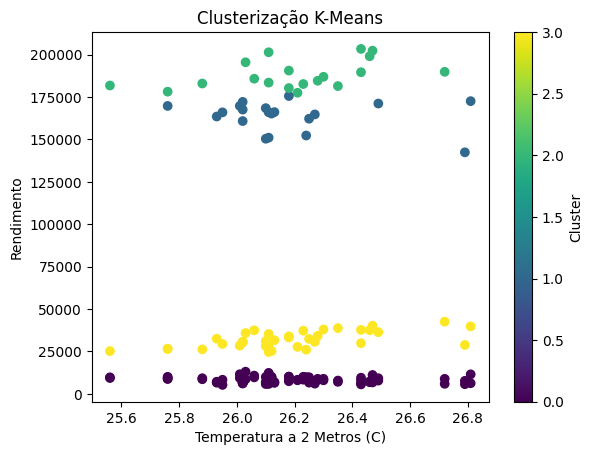

In [30]:
#Temperatura a 2 metros (ºC) vs Rendimento
import matplotlib.pyplot as plt

plt.scatter(data_encoded["Temperature at 2 Meters (C)"], data_encoded["Yield"], c=data_encoded["label_kmeans"], cmap='viridis')
plt.title('Clusterização K-Means')
plt.xlabel('Temperatura a 2 Metros (C)')
plt.ylabel('Rendimento')
plt.colorbar(label='Cluster')
plt.show()

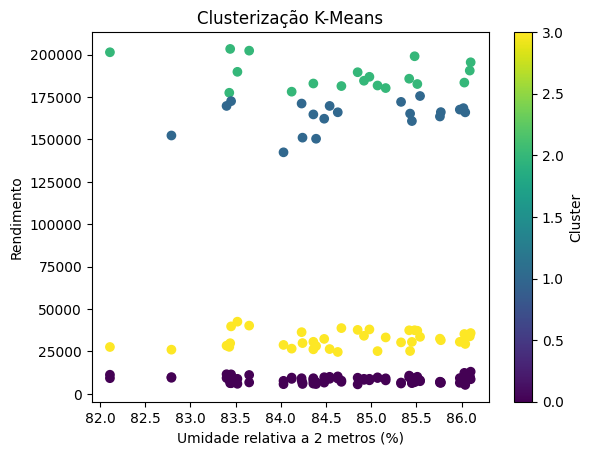

In [31]:
#Umidade relativa a 2 metros (%) vs Rendimento
plt.scatter(data_encoded["Relative Humidity at 2 Meters (%)"], data_encoded["Yield"], c=data_encoded["label_kmeans"], cmap='viridis')
plt.title('Clusterização K-Means')
plt.xlabel('Umidade relativa a 2 metros (%)')
plt.ylabel('Rendimento')
plt.colorbar(label='Cluster')
plt.show()

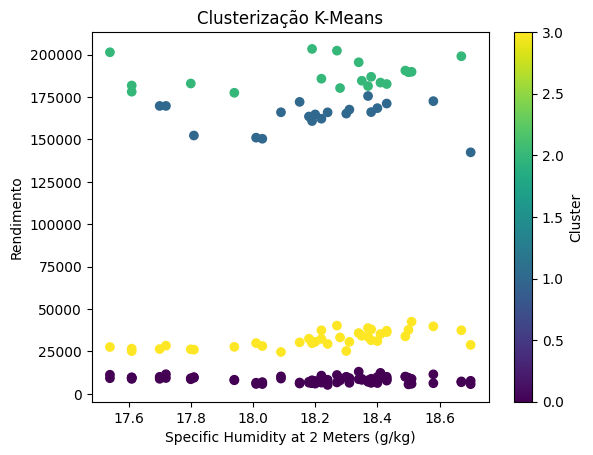

In [32]:
#Umidade específica a 2 metros (g/kg) vs Rendimento
plt.scatter(data_encoded["Specific Humidity at 2 Meters (g/kg)"], data_encoded["Yield"], c=data_encoded["label_kmeans"], cmap='viridis')
plt.title('Clusterização K-Means')
plt.xlabel('Specific Humidity at 2 Meters (g/kg)')
plt.ylabel('Rendimento')
plt.colorbar(label='Cluster')
plt.show()

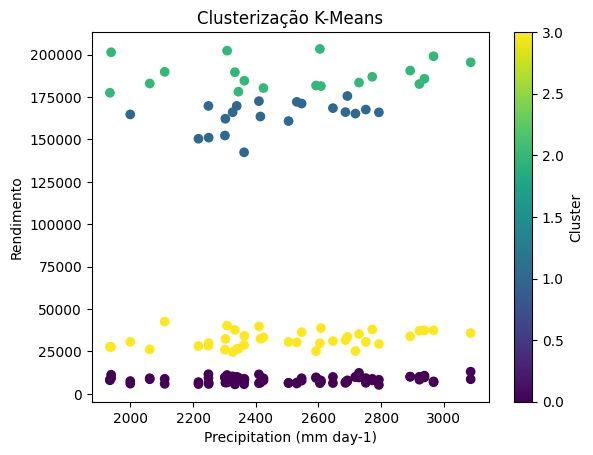

In [33]:
#Precipitação (mm dia 1) vs Rendimento
plt.scatter(data_encoded["Precipitation (mm day-1)"], data_encoded["Yield"], c=data_encoded["label_kmeans"], cmap='viridis')
plt.title('Clusterização K-Means')
plt.xlabel('Precipitation (mm day-1)')
plt.ylabel('Rendimento')
plt.colorbar(label='Cluster')
plt.show()

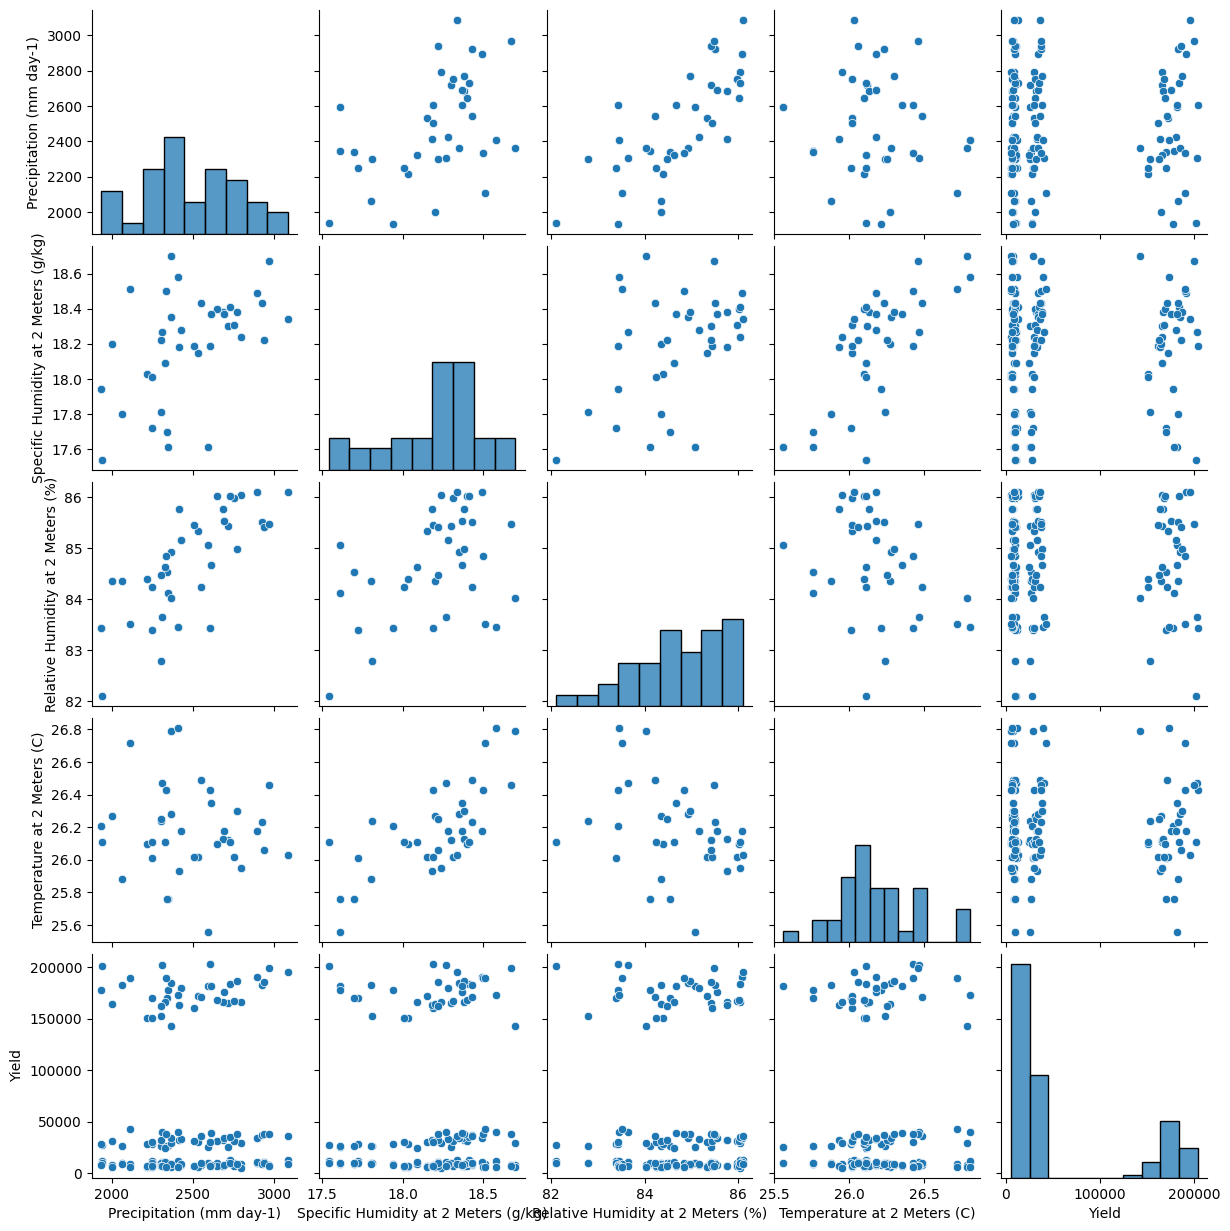

In [34]:
sns.pairplot(data)
plt.show()

In [35]:
#Analizando os dados com DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [36]:
import seaborn as sns
data = pd.read_csv('crop_yield.csv')
data_encoded = pd.get_dummies(data, columns=['Crop'])



In [37]:
data = pd.read_csv('crop_yield.csv')
display(data.sample(10))

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
61,Oil palm fruit,2692.34,18.37,85.54,26.18,175629
27,"Cocoa, beans",3085.79,18.34,86.10,26.03,13056
134,"Rubber, natural",2362.80,18.70,84.03,26.79,5693
19,"Cocoa, beans",2751.24,18.31,85.98,26.02,9274
122,"Rubber, natural",2339.30,17.70,84.54,25.76,10024
83,"Rice, paddy",2339.30,17.70,84.54,25.76,26399
44,Oil palm fruit,2339.30,17.70,84.54,25.76,169781
20,"Cocoa, beans",2646.28,18.40,86.02,26.10,9956
81,"Rice, paddy",2592.35,17.61,85.07,25.56,25187
105,"Rice, paddy",3085.79,18.34,86.10,26.03,35836


In [38]:
print(data_encoded.dtypes)

Precipitation (mm day-1)                float64
Specific Humidity at 2 Meters (g/kg)    float64
Relative Humidity at 2 Meters (%)       float64
Temperature at 2 Meters (C)             float64
Yield                                     int64
Crop_Cocoa, beans                          bool
Crop_Oil palm fruit                        bool
Crop_Rice, paddy                           bool
Crop_Rubber, natural                       bool
dtype: object


Colunas no DataFrame: Index(['Crop', 'Precipitation (mm day-1)',
       'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield'],
      dtype='object')


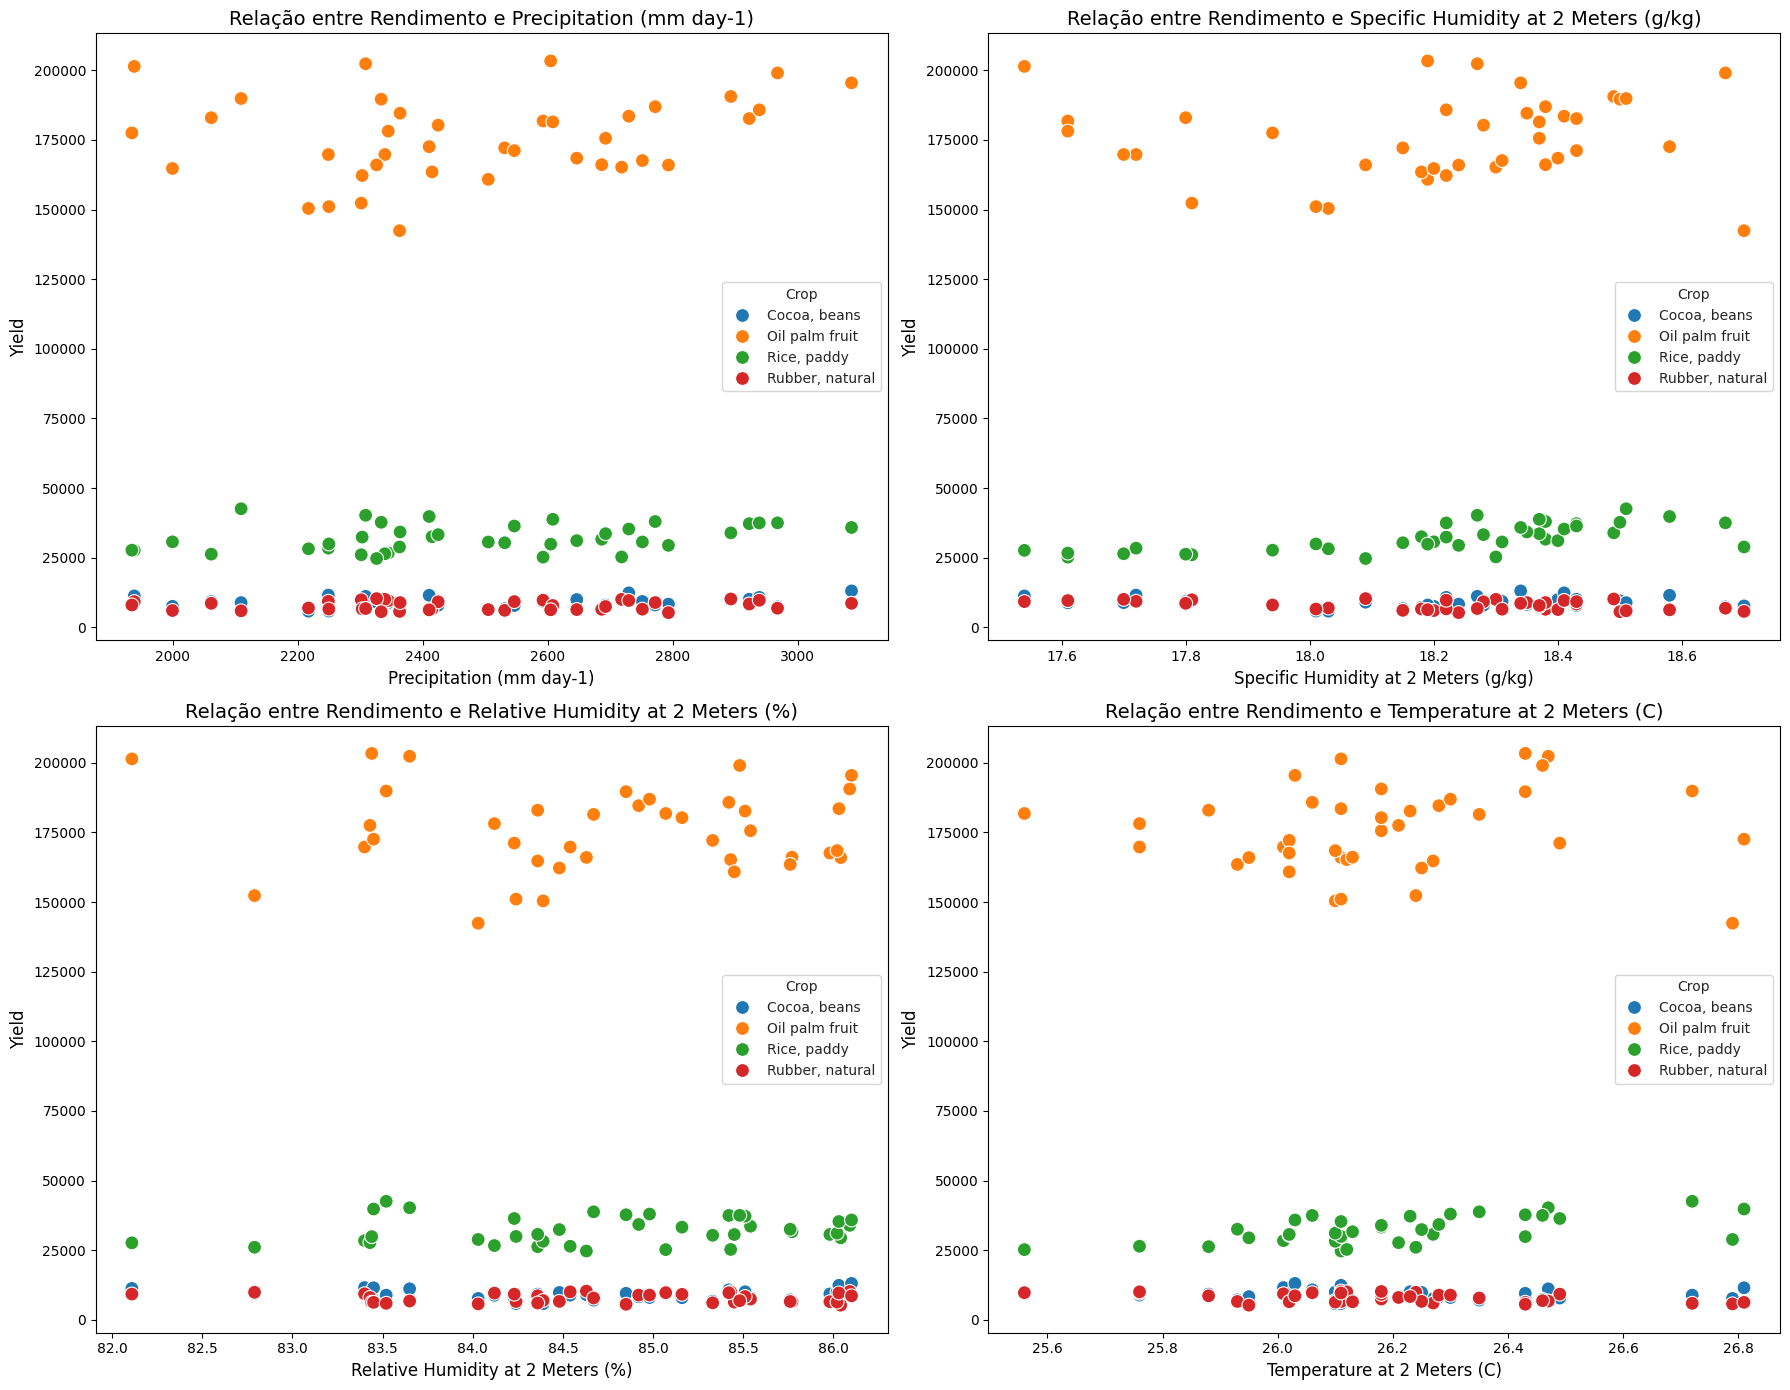

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
data = pd.read_csv('crop_yield.csv')

# Remover espaços em branco nos nomes das colunas
data.columns = data.columns.str.strip()

# Verificação das colunas
print("Colunas no DataFrame:", data.columns)

# Lista de características a serem plotadas contra 'Yield'
features_to_plot = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
                    'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']

# Configura a figura e os eixos para uma grade de 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
axes = axes.flatten()

# Define um estilo consistente para os gráficos
sns.set_style("whitegrid")

# Cria um gráfico de dispersão para cada característica contra 'Yield', colorido por 'Crop'
for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    sns.scatterplot(
        data=data,  # Usar o DataFrame original com a coluna 'Crop'
        x=feature,
        y='Yield',
        hue='Crop',
        palette='tab10',
        s=100,
        ax=ax
    )
    ax.set_title(f'Relação entre Rendimento e {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Yield', fontsize=12)

# Mostra todos os gráficos
plt.tight_layout()
plt.show()





O resultado dos gráficos com DBSCAN mostra que a cultura de Oil palm fruit é a que posui o maior rendimento. As culturas também possuem um melhor rendimento em ambientes em que a umidade relativa e especifica a dois metros não são tão baixas.

In [40]:
import seaborn as sns
data = pd.read_csv('crop_yield.csv')
data_encoded = pd.get_dummies(data, columns=['Crop'])
print(data_encoded.columns)


Index(['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield', 'Crop_Cocoa, beans', 'Crop_Oil palm fruit', 'Crop_Rice, paddy',
       'Crop_Rubber, natural'],
      dtype='object')


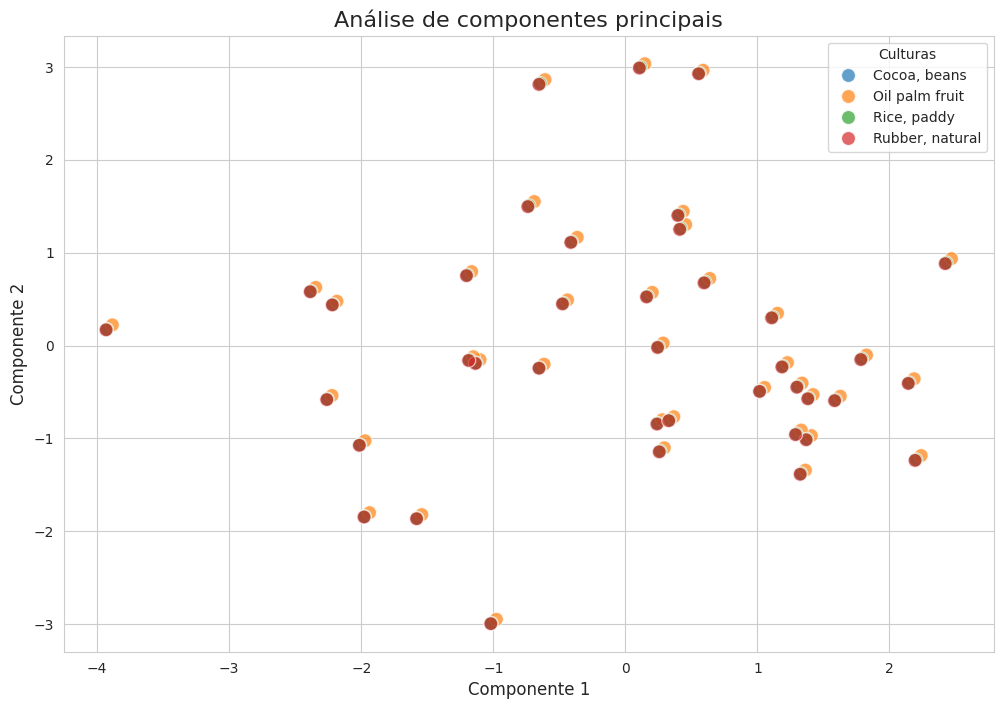

Variância explicada por componente: [0.42824516 0.31938395]


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carregar dados
data = pd.read_csv('crop_yield.csv')

# Remover espaços em branco nos nomes das colunas
data.columns = data.columns.str.strip()

# Codificação de variáveis categóricas
data_encoded = pd.get_dummies(data, columns=['Crop'])

# Seleção de características
features = ['Precipitation (mm day-1)',
            'Specific Humidity at 2 Meters (g/kg)',
            'Relative Humidity at 2 Meters (%)',
            'Temperature at 2 Meters (C)',
            'Yield']

data_features = data[features]

# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Aplicar PCA
pca = PCA(n_components=2)  # Selecionar 2 componentes principais
principal_components = pca.fit_transform(data_scaled)

# Criar um DataFrame para os componentes principais
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adicionar as colunas dummy para as 4 culturas
pc_df['Crop_Cocoa, beans'] = data_encoded['Crop_Cocoa, beans']
pc_df['Crop_Oil palm fruit'] = data_encoded['Crop_Oil palm fruit']
pc_df['Crop_Rice, paddy'] = data_encoded['Crop_Rice, paddy']
pc_df['Crop_Rubber, natural'] = data_encoded['Crop_Rubber, natural']

# Adicionar uma coluna para identificar as culturas
pc_df['Crop'] = data['Crop']

# Visualização dos Componentes Principais
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Crop', data=pc_df, palette='tab10', s=100, alpha=0.7)

plt.title('Análise de componentes principais', fontsize=16)
plt.xlabel('Componente 1', fontsize=12)
plt.ylabel('Componente 2', fontsize=12)
plt.legend(title='Culturas')
plt.grid(True)
plt.show()

# Variância explicada
print(f'Variância explicada por componente: {pca.explained_variance_ratio_}')


Como resultado da clusterização com PCA, foi identificado que as culturas tem componentes principais similares já que houve sobreposição de agrupamentos e/ou que os pontos de cores diferentes não estão tão distantes.

#Treinamento dos dados com Modelos Preditivos

In [43]:
#Preparando os dados para treinamento com Regressão Linear
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar o conjunto de dados
df = pd.read_csv('crop_yield.csv')

# Aplicar o One-Hot Encoding na coluna 'Crop'
data_encoded = pd.get_dummies(df, columns=['Crop'])

# Separar features (X) e a variável alvo (y).
X = data_encoded.drop('Yield', axis=1)
y = data_encoded['Yield']

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar apenas as features (X).
ss = StandardScaler()
numerical_cols = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
                  'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']

X_train[numerical_cols] = ss.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = ss.transform(X_test[numerical_cols])

# Instanciar e treinar o modelo de Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = lr.predict(X_test)

# Avaliar o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print("Resultados da Regressão Linear:")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R-squared): {r2:.2f}")

# Exibir os coeficientes do modelo
print("\nCoeficientes do Modelo:")
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

Resultados da Regressão Linear:
Erro Médio Absoluto (MAE): 3132.80
Erro Quadrático Médio (MSE): 19308693.24
Coeficiente de Determinação (R-squared): 1.00

Coeficientes do Modelo:
                                        Coeficiente
Precipitation (mm day-1)                3248.568218
Specific Humidity at 2 Meters (g/kg)   17463.636440
Relative Humidity at 2 Meters (%)     -15379.273097
Temperature at 2 Meters (C)           -16084.023004
Crop_Cocoa, beans                     -47119.189618
Crop_Oil palm fruit                   119664.144419
Crop_Rice, paddy                      -24189.279409
Crop_Rubber, natural                  -48355.675392


**Interpretação:**
As variáveis Precipitação e Umidade específica possuem coeficientes positivos. Assim, um **aumento da precipitação e da umidade específica** podem indicar um **maior** rendimento.

As variáveis Temperatura e Umidade relativapossuem coeficientes negativos.
Assim, um **aumento da temperatura e da umidade relativa** podem indicar um** menor** rendimento.

A cultura Oil palm fruit também demonstra um rendimento maior em relação a outras culturas que tivera o coeficiente negativo.


In [44]:
print("Primeiras linhas de X_train:")
print(X_train.head())

print("Primeiras linhas de y_train:")
print(y_train.head())

Primeiras linhas de X_train:
     Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
56                  -0.403713                              1.632363   
138                 -0.609950                              0.066305   
123                 -0.530297                             -0.357836   
128                 -0.793705                             -0.618846   
127                 -0.906047                             -0.553593   

     Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  \
56                           -0.635284                     2.212663   
138                          -0.189106                     0.206978   
123                          -0.040380                    -0.313014   
128                          -0.427068                    -0.313014   
127                          -0.278342                    -0.350156   

     Crop_Cocoa, beans  Crop_Oil palm fruit  Crop_Rice, paddy  \
56               False                 True         

In [45]:
#Treinamento com Regressão por Árvores de Decisão
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar o conjunto de dados
df = pd.read_csv('crop_yield.csv')

# Aplicar o One-Hot Encoding na coluna 'Crop'
data_encoded = pd.get_dummies(df, columns=['Crop'])

# Separar features (X) e a variável alvo (y)
X = data_encoded.drop('Yield', axis=1)
y = data_encoded['Yield']

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de Regressão por Árvores de Decisão
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = dt_regressor.predict(X_test)

# Avaliar o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print("Resultados da Regressão por Árvores de Decisão:")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R-squared): {r2:.2f}")

print("\nCoeficientes do Modelo:")
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

Resultados da Regressão por Árvores de Decisão:
Erro Médio Absoluto (MAE): 3440.69
Erro Quadrático Médio (MSE): 31813142.25
Coeficiente de Determinação (R-squared): 0.99

Coeficientes do Modelo:
                                        Coeficiente
Precipitation (mm day-1)                3248.568218
Specific Humidity at 2 Meters (g/kg)   17463.636440
Relative Humidity at 2 Meters (%)     -15379.273097
Temperature at 2 Meters (C)           -16084.023004
Crop_Cocoa, beans                     -47119.189618
Crop_Oil palm fruit                   119664.144419
Crop_Rice, paddy                      -24189.279409
Crop_Rubber, natural                  -48355.675392


**Interpretação:**

Com relação a interpretação dos coeficientes do modelo, ambos os modelos chegam a uma tendência similar.

O R-squared foi de 0.99, mas o MAE e o MSE da regressão por árvore de decisão foi maior comparado ao modelo de regressão simples


In [46]:
#Treinamento com Random Forest Regressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar o conjunto de dados
df = pd.read_csv('crop_yield.csv')

# Aplicar o One-Hot Encoding na coluna 'Crop'
data_encoded = pd.get_dummies(df, columns=['Crop'])

# Separar features (X) e a variável alvo (y)
X = data_encoded.drop('Yield', axis=1)
y = data_encoded['Yield']

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_regressor.predict(X_test)

# Avaliar o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print("Resultados da Regressão por Random Forest:")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R-squared): {r2:.2f}")

print("\nCoeficientes do Modelo:")
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

# Exibir a importância das features
print("\nImportância das Features:")
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_regressor.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

Resultados da Regressão por Random Forest:
Erro Médio Absoluto (MAE): 2739.81
Erro Quadrático Médio (MSE): 22532198.99
Coeficiente de Determinação (R-squared): 0.99

Coeficientes do Modelo:
                                        Coeficiente
Precipitation (mm day-1)                3248.568218
Specific Humidity at 2 Meters (g/kg)   17463.636440
Relative Humidity at 2 Meters (%)     -15379.273097
Temperature at 2 Meters (C)           -16084.023004
Crop_Cocoa, beans                     -47119.189618
Crop_Oil palm fruit                   119664.144419
Crop_Rice, paddy                      -24189.279409
Crop_Rubber, natural                  -48355.675392

Importância das Features:
                                Feature  Importance
5                   Crop_Oil palm fruit    0.969180
6                      Crop_Rice, paddy    0.017492
1  Specific Humidity at 2 Meters (g/kg)    0.004514
0              Precipitation (mm day-1)    0.003520
3           Temperature at 2 Meters (C)    0.003399
2  

**Interpretação:**

Com relação a interpretação dos coeficientes do modelo, os modelos chegam a uma tendência similar.

O R-squared foi de 0.99. O MAE de 2739.81 pode indicar que as previsões do modelo se aproximaram mais dos valores reais.



In [47]:
#Treinamento com XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# 1. Carregar o arquivo CSV
data = pd.read_csv('crop_yield.csv')

# 2. Aplicar One-Hot Encoding na coluna 'Crop'
data_encoded = pd.get_dummies(data, columns=['Crop'])

# 3. Verificar e tratar valores ausentes na coluna 'Yield'
data_encoded['Yield'] = pd.to_numeric(data_encoded['Yield'], errors='coerce')

# Remover linhas com dados ausentes
data_encoded = data_encoded.dropna()

# 4. Preparar os dados
X = data_encoded.drop('Yield', axis=1)
y = data_encoded['Yield']

# Verificar valores únicos em y
print(y.unique())

# Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo XGBoost para Regressão
model = XGBRegressor(eval_metric='mae')
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar a precisão do Modelo
print("Resultados da Regressão por Random Forest:")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R-squared): {r2:.2f}")

print("\nCoeficientes do Modelo:")
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

# Exibir a importância das features
print("\nImportância das Features:")
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_regressor.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)



[ 11560  11253   9456   9321   8800   8850   9003   9880   9201   8300
   5765   5812   6667   6530   6912   7138   7525   7663   9274   9956
   9801   7965   7919   8226  10062  12362  13056  10058   7795  10737
   7979   7066   7991  11108  11487   7314   9502   8848 169783 201436
 152343 181826 178183 169781 166042 165262 183004 177543 150428 151070
 172165 160862 166136 163541 164772 142425 165993 167621 168476 162240
 175629 180323 184629 190626 183544 195523 182696 171189 185831 186959
 181496 203399 202379 172601 199074 189657 189896  28409  27619  26041
  25187  26648  26399  24686  25251  26251  27694  28178  29918  30348
  30614  31619  32510  30676  28829  29415  30640  31101  32385  33596
  33260  34221  33907  35277  35836  37205  36361  37468  37972  38763
  29855  40223  39775  37496  37704  42550   9322   9223   9866   9718
   9573  10024  10285  10010   8604   8002   6913   6546   6077   6333
   6448   6562   6008   5693   5249   6484   6348   6597   7435   9139
   885

**Interpretação:**

Com relação a interpretação dos coeficientes do modelo, os modelos chegam a uma tendência similar.

O R-squared foi de 0.99. Contudo, o MAE e o MSE fora mais altos se comparados aos modelos anteriores.

In [48]:
#Treinamento com SVR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Carregar o arquivo CSV
data = pd.read_csv('crop_yield.csv')

# Aplicar One-Hot Encoding na coluna 'Crop'
data_encoded = pd.get_dummies(data, columns=['Crop'])

# Preparar os dados
X = data_encoded.drop('Yield', axis=1)
y = data_encoded['Yield']

# Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Se você quiser usar padronização em vez de normalização, use o código abaixo
# scaler = StandardScaler()
# X_train_standardized = scaler.fit_transform(X_train)
# X_test_standardized = scaler.transform(X_test)

#Criar o modelo SVR para Regressão
model = SVR(kernel='rbf')

#Treinar o modelo
model.fit(X_train_normalized, y_train)

#Fazer previsões
y_pred = model.predict(X_test_normalized)

# Avaliar a precisão do Modelo
print("Resultados da Regressão por Random Forest:")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R-squared): {r2:.2f}")

print("\nCoeficientes do Modelo:")
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

# Exibir a importância das features
print("\nImportância das Features:")
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_regressor.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

Resultados da Regressão por Random Forest:
Erro Médio Absoluto (MAE): 2739.81
Erro Quadrático Médio (MSE): 22532198.99
Coeficiente de Determinação (R-squared): 0.99

Coeficientes do Modelo:
                                        Coeficiente
Precipitation (mm day-1)                3248.568218
Specific Humidity at 2 Meters (g/kg)   17463.636440
Relative Humidity at 2 Meters (%)     -15379.273097
Temperature at 2 Meters (C)           -16084.023004
Crop_Cocoa, beans                     -47119.189618
Crop_Oil palm fruit                   119664.144419
Crop_Rice, paddy                      -24189.279409
Crop_Rubber, natural                  -48355.675392

Importância das Features:
                                Feature  Importance
5                   Crop_Oil palm fruit    0.969180
6                      Crop_Rice, paddy    0.017492
1  Specific Humidity at 2 Meters (g/kg)    0.004514
0              Precipitation (mm day-1)    0.003520
3           Temperature at 2 Meters (C)    0.003399
2  

**Interpretação:**

Com relação a interpretação dos coeficientes do modelo, os modelos chegam a uma tendência similar.

O R-squared foi de 0.99. Contudo, o MAE e o MSE foram altos.